# EXAMEN 1 MOD2 REGRESIÓN LINEAL

## Importar

In [2]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [3]:
## Conocer encoding de csv
liga = '/home/ef/Documents/Diplomado/EXAMEN02/'
import chardet
with open(liga + 'train_default.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
df = pd.read_csv(liga + 'train_default.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
df.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
5047,19882,50000.0,2,5,2,36,0,0,0,0,0,0,46277.0,42207.0,20361.0,17527.0,17318.0,17738.0,2058.0,1265.0,5000.0,700.0,700.0,800.0,0
3508,13125,50000.0,1,3,1,45,0,0,0,0,0,0,45982.0,41372.0,18059.0,18020.0,18028.0,17744.0,1421.0,1500.0,629.0,672.0,626.0,2000.0,0
2114,6970,170000.0,1,1,2,27,0,0,2,2,2,2,133149.0,138769.0,145050.0,146641.0,149603.0,157601.0,11936.0,13314.0,5801.0,5800.0,11000.0,1000.0,0
2944,5163,70000.0,2,2,1,49,0,0,0,0,0,0,64049.0,66079.0,67488.0,58246.0,48859.0,46688.0,3700.0,3100.0,2200.0,1600.0,1850.0,1800.0,1


In [5]:
df.rename(columns = {'PAY_0':'PAY_1',
                    'default.payment.next.month':'incumple'},
          inplace = True)
dim_antes = len(df)
df = df.iloc[:,1:].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   SEX        5625 non-null   int64  
 2   EDUCATION  5625 non-null   int64  
 3   MARRIAGE   5625 non-null   int64  
 4   AGE        5625 non-null   int64  
 5   PAY_1      5625 non-null   int64  
 6   PAY_2      5625 non-null   int64  
 7   PAY_3      5625 non-null   int64  
 8   PAY_4      5625 non-null   int64  
 9   PAY_5      5625 non-null   int64  
 10  PAY_6      5625 non-null   int64  
 11  BILL_AMT1  5625 non-null   float64
 12  BILL_AMT2  5625 non-null   float64
 13  BILL_AMT3  5625 non-null   float64
 14  BILL_AMT4  5625 non-null   float64
 15  BILL_AMT5  5625 non-null   float64
 16  BILL_AMT6  5625 non-null   float64
 17  PAY_AMT1   5625 non-null   float64
 18  PAY_AMT2   5625 non-null   float64
 19  PAY_AMT3   5625 non-null   float64
 20  PAY_AMT4

In [6]:
cat = list(df.columns[1:11])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_1      5625 non-null   object
 4   PAY_2      5625 non-null   object
 5   PAY_3      5625 non-null   object
 6   PAY_4      5625 non-null   object
 7   PAY_5      5625 non-null   object
 8   PAY_6      5625 non-null   object
dtypes: object(9)
memory usage: 395.6+ KB


In [7]:
tgt = ['incumple']
num = [col for col in df.columns if col not in cat + tgt]
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   AGE        5625 non-null   int64  
 2   BILL_AMT1  5625 non-null   float64
 3   BILL_AMT2  5625 non-null   float64
 4   BILL_AMT3  5625 non-null   float64
 5   BILL_AMT4  5625 non-null   float64
 6   BILL_AMT5  5625 non-null   float64
 7   BILL_AMT6  5625 non-null   float64
 8   PAY_AMT1   5625 non-null   float64
 9   PAY_AMT2   5625 non-null   float64
 10  PAY_AMT3   5625 non-null   float64
 11  PAY_AMT4   5625 non-null   float64
 12  PAY_AMT5   5625 non-null   float64
 13  PAY_AMT6   5625 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 615.4 KB


In [8]:
pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

## Análisis exploratorio

### Categóricas

In [9]:
## Reemplazar por "Otros"
dict_replace = {'0':'4',
                '5':'4',
                '6':'4'}
df['EDUCATION'] = df['EDUCATION'].replace(dict_replace).copy()

dict_replace = {'0':'3'}
df['MARRIAGE'] = df['MARRIAGE'].replace(dict_replace).copy()

df[cat].isnull().sum() / len(df)

SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
dtype: float64

In [10]:
len(df) / dim_antes

1.0

### Numéricas

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

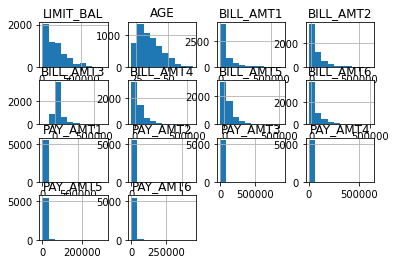

In [11]:
df[num].hist()

In [12]:
len(df) / dim_antes

1.0

## Ingeniería de variables

### Numéricas

In [13]:
## Promedio de todos los montos de pago
df['Prom_monto'] = df[monto].mean(axis = 1)
num += ['Prom_monto']
df['Prom_monto'].describe()

count      5625.000000
mean      45191.350252
std       64282.868301
min       -7081.166667
25%        4580.500000
50%       20064.500000
75%       56411.500000
max      548854.333333
Name: Prom_monto, dtype: float64

In [14]:
## Promedio de todos los pagos de pago
df['Prom_pago'] = df[pago].mean(axis = 1)
num += ['Prom_pago']
df['Prom_pago'].describe()

count      5625.000000
mean       5328.803081
std       12037.570814
min           0.000000
25%        1092.333333
50%        2321.666667
75%        5500.000000
max      627344.333333
Name: Prom_pago, dtype: float64

<AxesSubplot:>

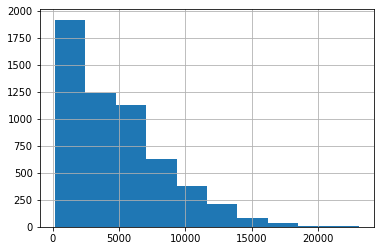

In [15]:
for x in monto:
    df[f'Lim_{x}'] = df[x] / df['LIMIT_BAL']

df['Lim_edad'] = df['LIMIT_BAL'] / df['AGE']

lim = [col for col in df.columns if col.startswith('Lim')]
num += lim

df['Lim_edad'].hist()

In [16]:
## Dimensión hasta ahora
df.shape

(5625, 33)

In [17]:
df.reset_index(drop = True, inplace = True)

### Categóricas

In [18]:
for col in estatus:
    aux = []
    for i in range(len(df)):
        if int(df[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(df[col][i])
    df[col] = aux

for col in estatus:
    display(df[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_1
2,-1,0.188978
3,-2,0.093156
0,0,0.494400
1,>=1,0.223467


,index,PAY_2
1,-1,0.200533
3,-2,0.125689
0,0,0.526933
2,>=1,0.146844


,index,PAY_3
1,-1,0.200356
3,-2,0.134578
0,0,0.527822
2,>=1,0.137244


,index,PAY_4
1,-1,0.191289
2,-2,0.142933
0,0,0.552178
3,>=1,0.113600


,index,PAY_5
1,-1,0.181689
2,-2,0.150933
0,0,0.573156
3,>=1,0.094222


,index,PAY_6
1,-1,0.189156
2,-2,0.164444
0,0,0.542044
3,>=1,0.104356


In [19]:
## Monto negativo/cero o pago igual a cero?
tipo = []
for col in monto + pago:
    aux = []
    for x in df[col]:
        if int(x) <= 0:
            aux.append('<=0')
        else:
            aux.append('>0')
    df[f'{col}_tipo'] = aux
    tipo += [f'{col}_tipo']

for x in tipo:
    display(df[x].value_counts(1).reset_index())

,index,BILL_AMT1_tipo
0,>0,0.914489
1,<=0,0.085511


,index,BILL_AMT2_tipo
0,>0,0.894222
1,<=0,0.105778


,index,BILL_AMT3_tipo
0,>0,0.886222
1,<=0,0.113778


,index,BILL_AMT4_tipo
0,>0,0.870044
1,<=0,0.129956


,index,BILL_AMT5_tipo
0,>0,0.862933
1,<=0,0.137067


,index,BILL_AMT6_tipo
0,>0,0.843378
1,<=0,0.156622


,index,PAY_AMT1_tipo
0,>0,0.824711
1,<=0,0.175289


,index,PAY_AMT2_tipo
0,>0,0.823111
1,<=0,0.176889


,index,PAY_AMT3_tipo
0,>0,0.796622
1,<=0,0.203378


,index,PAY_AMT4_tipo
0,>0,0.791467
1,<=0,0.208533


,index,PAY_AMT5_tipo
0,>0,0.769244
1,<=0,0.230756


,index,PAY_AMT6_tipo
0,>0,0.761956
1,<=0,0.238044


In [20]:
for col in cat[:3]:
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_1      5625 non-null   object
 4   PAY_2      5625 non-null   object
 5   PAY_3      5625 non-null   object
 6   PAY_4      5625 non-null   object
 7   PAY_5      5625 non-null   object
 8   PAY_6      5625 non-null   object
dtypes: object(9)
memory usage: 395.6+ KB


### Diccionarios

In [21]:
df['SEX'].replace({'1':'Hombre',
                   '2':'Mujer'},inplace = True)

df['EDUCATION'].replace({'1':'Preparatoria',
                         '2':'Universidad',
                         '3':'Secundaria', 
                         '4':'Otros'}, inplace = True)

df['MARRIAGE'].replace({'1':'Soltero',
                        '2':'Casado',
                        '3':'Otros'}, inplace = True)

for i in range(1,7):
    df[f'PAY_{i}'].replace({'-2':'No_uso',
                           '0':'Uso', 
                           '-1':'Pago_correcto', 
                           '>=1':'Pago_retrasado'}, inplace = True)

In [22]:
num = list(pd.DataFrame(df.describe()).columns)
tgt = ['incumple']
num = [x for x in num if x not in tgt]
cat = [col for col in df.columns if col not in num + tgt]
df = df[cat + num + tgt].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEX             5625 non-null   object 
 1   EDUCATION       5625 non-null   object 
 2   MARRIAGE        5625 non-null   object 
 3   PAY_1           5625 non-null   object 
 4   PAY_2           5625 non-null   object 
 5   PAY_3           5625 non-null   object 
 6   PAY_4           5625 non-null   object 
 7   PAY_5           5625 non-null   object 
 8   PAY_6           5625 non-null   object 
 9   BILL_AMT1_tipo  5625 non-null   object 
 10  BILL_AMT2_tipo  5625 non-null   object 
 11  BILL_AMT3_tipo  5625 non-null   object 
 12  BILL_AMT4_tipo  5625 non-null   object 
 13  BILL_AMT5_tipo  5625 non-null   object 
 14  BILL_AMT6_tipo  5625 non-null   object 
 15  PAY_AMT1_tipo   5625 non-null   object 
 16  PAY_AMT2_tipo   5625 non-null   object 
 17  PAY_AMT3_tipo   5625 non-null   o

## Modelaje

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>],
       [<AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>,
        <AxesSubplot:title={'center':'Prom_monto'}>],
       [<AxesSubplot:title={'center':'Prom_pago'}>,
        <AxesSubplot:title={'center':'Lim_BILL_AMT1'}>,
        <AxesSubplot:title={'center':'Lim_BILL_AMT2'}>,
        <AxesSubplot:title={'center':'Lim_BILL_AMT3'}>,
        

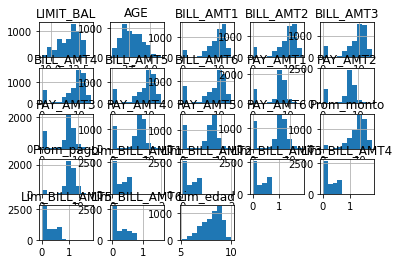

In [23]:
## Se obtiene el log de las variables para "tratar" outliers
for col in num:
    df[col] = np.log(abs(df[col]) + 1)
df[num].hist()

In [24]:
X = pd.get_dummies(df[cat]).join(df[num])
y = df[tgt]
y.mean()

incumple    0.218133
dtype: float64

In [25]:
X.shape

(5625, 80)

### Escalamiento

In [26]:
## Se separan los conjuntos de entrenamiento y prueba
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 22)
len(y_test) / len(y_train)

0.1112208613196365

In [27]:
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()

## En train se ajusta y transforma
X = pd.DataFrame(mm_x.fit_transform(X_train),
                 columns = X.columns)
y = mm_y.fit_transform(y_train)

## Y en test sólo se transforma
X_test_mm = pd.DataFrame(mm_x.transform(X_test),
                         columns = X.columns)
y_test_mm = mm_y.transform(y_test)

X.describe()

,SEX_Hombre,SEX_Mujer,EDUCATION_Otros,EDUCATION_Preparatoria,EDUCATION_Secundaria,EDUCATION_Universidad,MARRIAGE_Casado,MARRIAGE_Otros,MARRIAGE_Soltero,PAY_1_No_uso,PAY_1_Pago_correcto,PAY_1_Pago_retrasado,PAY_1_Uso,PAY_2_No_uso,PAY_2_Pago_correcto,PAY_2_Pago_retrasado,PAY_2_Uso,PAY_3_No_uso,PAY_3_Pago_correcto,PAY_3_Pago_retrasado,PAY_3_Uso,PAY_4_No_uso,PAY_4_Pago_correcto,PAY_4_Pago_retrasado,PAY_4_Uso,PAY_5_No_uso,PAY_5_Pago_correcto,PAY_5_Pago_retrasado,PAY_5_Uso,PAY_6_No_uso,PAY_6_Pago_correcto,PAY_6_Pago_retrasado,PAY_6_Uso,BILL_AMT1_tipo_<=0,BILL_AMT1_tipo_>0,BILL_AMT2_tipo_<=0,BILL_AMT2_tipo_>0,BILL_AMT3_tipo_<=0,BILL_AMT3_tipo_>0,BILL_AMT4_tipo_<=0,BILL_AMT4_tipo_>0,BILL_AMT5_tipo_<=0,BILL_AMT5_tipo_>0,BILL_AMT6_tipo_<=0,BILL_AMT6_tipo_>0,PAY_AMT1_tipo_<=0,PAY_AMT1_tipo_>0,PAY_AMT2_tipo_<=0,PAY_AMT2_tipo_>0,PAY_AMT3_tipo_<=0,PAY_AMT3_tipo_>0,PAY_AMT4_tipo_<=0,PAY_AMT4_tipo_>0,PAY_AMT5_tipo_<=0,PAY_AMT5_tipo_>0,PAY_AMT6_tipo_<=0,PAY_AMT6_tipo_>0,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,Lim_BILL_AMT1,Lim_BILL_AMT2,Lim_BILL_AMT3,Lim_BILL_AMT4,Lim_BILL_AMT5,Lim_BILL_AMT6,Lim_edad
count,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000
mean,0.383840,0.616160,0.013829,0.364480,0.162979,0.458712,0.536942,0.012051,0.451008,0.092256,0.186685,0.226195,0.494864,0.124654,0.197353,0.150928,0.527064,0.132359,0.197155,0.142236,0.528250,0.140853,0.188068,0.116555,0.554524,0.150138,0.179968,0.096207,0.573686,0.164559,0.187870,0.105097,0.542473,0.084354,0.915646,0.105492,0.894508,0.112604,0.887396,0.128013,0.871987,0.136507,0.863493,0.157843,0.842157,0.177993,0.822007,0.177400,0.822600,0.201501,0.798499,0.210194,0.789806,0.232319,0.767681,0.238246,0.761754,0.558897,0.402144,0.685222,0.668184,0.661883,0.653873,0.644201,0.630320,0.480949,0.468656,0.457074,0.456433,0.470418,0.455771,0.711479,0.561025,0.156026,0.152759,0.157957,0.150960,0.144100,0.155687,0.607454
std,0.486368,0.486368,0.116790,0.481332,0.369383,0.498342,0.498683,0.109122,0.497643,0.289416,0.389697,0.418408,0.500023,0.330359,0.398040,0.358015,0.499316,0.338914,0.397890,0.349327,0.499251,0.347905,0.390805,0.320921,0.497067,0.357242,0.384199,0.294904,0.494589,0.370819,0.390647,0.306708,0.498242,0.277945,0.277945,0.307217,0.307217,0.316139,0.316139,0.334137,0.334137,0.343360,0.343360,0.364630,0.364630,0.382545,0.382545,0.382045,0.382045,0.401161,0.401161,0.407486,0.407486,0.422353,0.422353,0.426052,0.426052,0.213528,0.208151,0.230441,0.247153,0.251183,0.263870,0.271161,0.285029,0.237834,0.233102,0.245942,0.252291,0.274926,0.271053,0.181036,0.156184,0.139165,0.138575,0.145327,0.142521,0.139819,0.156106,0.188518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

### Reducción de dimensiones

In [28]:
# Se eligirán las mejores variables
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
kb = SelectKBest(k = 22, score_func = f_classif)
kb.fit(X, y)

ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
X[ls_best].describe()

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,PAY_1_Pago_retrasado,PAY_1_Uso,PAY_2_Pago_retrasado,PAY_2_Uso,PAY_3_Pago_retrasado,PAY_3_Uso,PAY_4_Pago_retrasado,PAY_5_Pago_retrasado,PAY_6_Pago_retrasado,PAY_AMT1_tipo_<=0,PAY_AMT1_tipo_>0,PAY_AMT2_tipo_<=0,PAY_AMT2_tipo_>0,PAY_AMT3_tipo_<=0,PAY_AMT3_tipo_>0,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,Prom_pago,Lim_BILL_AMT5,Lim_edad
count,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000
mean,0.226195,0.494864,0.150928,0.527064,0.142236,0.528250,0.116555,0.096207,0.105097,0.177993,0.822007,0.177400,0.822600,0.201501,0.798499,0.558897,0.480949,0.468656,0.457074,0.561025,0.144100,0.607454
std,0.418408,0.500023,0.358015,0.499316,0.349327,0.499251,0.320921,0.294904,0.306708,0.382545,0.382545,0.382045,0.382045,0.401161,0.401161,0.213528,0.237834,0.233102,0.245942,0.156184,0.139819,0.188518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.367272,0.504391,0.488620,0.435739,0.523750,0.006267,0.480979
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.602238,0.557038,0.542545,0.542643,0.579659,0.110242,0.641569
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.725242,0.622602,0.607923,0.616502,0.645448,0.263206,0.751725
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

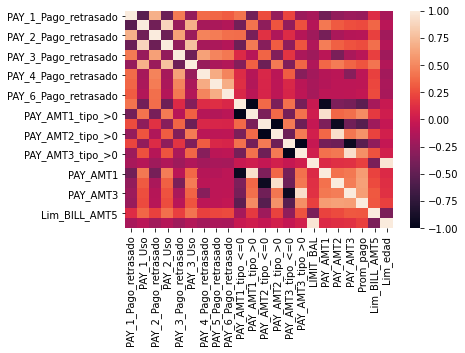

In [29]:
import seaborn as sns
sns.heatmap(X[ls_best].corr())

In [30]:
## Y modificamos la matriz X con las mejores variables
X = X[ls_best].copy()

### Entrenamiento

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg_res = cross_val_score(estimator = logreg,
                         X = X,
                         y = y,
                         cv = 3,
                         n_jobs = -1,
                         scoring = "roc_auc")

np.mean(logreg_res), np.std(logreg_res)

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7603513434993282, 0.006510436077267832)

In [32]:
from sklearn.linear_model import SGDClassifier
sgdr = SGDClassifier()
sgdr.fit(X, y)
sgd_res = cross_val_score(estimator = sgdr,
                            X = X,
                            y = y,
                            cv = 3,
                            n_jobs = -1,
                            scoring = 'roc_auc')
np.mean(sgd_res), np.std(sgd_res)

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.7536659550702617, 0.004523199329091757)

### Hiperparametrización

In [33]:
## Y qcuánto mejora el SGD si hiper-parametrizamos
param_grid = {"loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
              "penalty": ["l2", "l1", "elasticnet"],
              "alpha": [x/100+0.01 for x in range(100)],
              "l1_ratio": [x/10 for x in range(10)],
              "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
              "eta0": [0.001]
             }
n_hyper = np.prod(list(map(len, param_grid.values())))
n_hyper

60000

from sklearn.model_selection import RandomizedSearchCV
model = SGDClassifier()
hyper = RandomizedSearchCV(estimator = model,
                           n_jobs = -1,
                           scoring = 'roc_auc',
                           param_distributions = param_grid,
                           error_score = -1000,
                           verbose = 5,
                           n_iter = int(n_hyper*.05),
                           random_state = 0,
                           cv = 3)
hyper.fit(X, y)
hyper.best_score_

### Prueba

In [34]:
X.sample()

,PAY_1_Pago_retrasado,PAY_1_Uso,PAY_2_Pago_retrasado,PAY_2_Uso,PAY_3_Pago_retrasado,PAY_3_Uso,PAY_4_Pago_retrasado,PAY_5_Pago_retrasado,PAY_6_Pago_retrasado,PAY_AMT1_tipo_<=0,PAY_AMT1_tipo_>0,PAY_AMT2_tipo_<=0,PAY_AMT2_tipo_>0,PAY_AMT3_tipo_<=0,PAY_AMT3_tipo_>0,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,Prom_pago,Lim_BILL_AMT5,Lim_edad
255,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.683635,0.647193,0.64579,0.706707,0.682067,0.373769,0.720386


In [35]:
## Y se corre para el conjunto de prueba
from sklearn.metrics import roc_auc_score
'{:,.2%}'.format(roc_auc_score(y_score = logreg.predict(X_test_mm[ls_best]),
                               y_true = y_test_mm))

'58.40%'

In [36]:
logreg.predict(X_test_mm[ls_best]).mean()

0.07460035523978685

In [37]:
import pickle

## Guardar modelo
with open('log_cs.pkl', 'wb') as file:
    pickle.dump(logreg, file)

## Abrir un modelo
with open('log_cs.pkl', 'rb') as file:
    log_cs = pickle.load(file)

## Listo para usarse
log_cs

LogisticRegression()

In [38]:
'{:,.2%}'.format(roc_auc_score(y_score = log_cs.predict(X_test_mm[ls_best]),
                               y_true = y_test_mm))

'58.40%'

##Y se corre para el conjunto de prueba
from sklearn.metrics import roc_auc_score
'{:,.2%}'.format(roc_auc_score(y_score = hyper.predict(X_test_mm[ls_best]),
                               y_true = y_test_mm))

## Validación

In [35]:
val = pd.read_csv(liga + 'val_default.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
val.rename(columns = {'PAY_0':'PAY_1'},
          inplace = True)
val.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
509,19177,140000.0,1,3,1,59,-1,-1,-1,-1,-1,-1,2859.0,3447.0,0.0,2061.0,0.0,3035.0,3447.0,0.0,2061.0,0.0,3035.0,2302.0
1623,26189,260000.0,2,2,1,35,-1,-1,-1,-1,-1,0,5656.0,591.0,6574.0,3551.0,3634.0,2440.0,869.0,6574.0,3551.0,3700.0,0.0,1047.0
1343,29479,230000.0,2,1,2,26,-2,-1,-1,0,0,0,865.0,221.0,16601.0,17833.0,15708.0,10013.0,221.0,16601.0,1513.0,1000.0,350.0,500.0
1482,14489,80000.0,1,1,2,29,1,2,2,-2,-2,-2,49373.0,49812.0,0.0,0.0,0.0,0.0,1980.0,19800.0,0.0,0.0,0.0,0.0


In [37]:
cat = list(val.columns[2:12])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    val[col] = val[col].astype(str)
val[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        1875 non-null   object
 1   EDUCATION  1875 non-null   object
 2   MARRIAGE   1875 non-null   object
 3   PAY_1      1875 non-null   object
 4   PAY_2      1875 non-null   object
 5   PAY_3      1875 non-null   object
 6   PAY_4      1875 non-null   object
 7   PAY_5      1875 non-null   object
 8   PAY_6      1875 non-null   object
dtypes: object(9)
memory usage: 132.0+ KB


In [38]:
## Reemplazar por "Otros"
dict_replace = {'0':'4',
                '5':'4',
                '6':'4'}
val['EDUCATION'] = val['EDUCATION'].replace(dict_replace).copy()

dict_replace = {'0':'3'}
val['MARRIAGE'] = val['MARRIAGE'].replace(dict_replace).copy()

val[cat].isnull().sum() / len(val)

SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
dtype: float64

In [39]:
num = [col for col in val.columns if col not in cat + ['CUSTOMER_ID']]
val[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  1875 non-null   float64
 1   AGE        1875 non-null   int64  
 2   BILL_AMT1  1875 non-null   float64
 3   BILL_AMT2  1875 non-null   float64
 4   BILL_AMT3  1875 non-null   float64
 5   BILL_AMT4  1875 non-null   float64
 6   BILL_AMT5  1875 non-null   float64
 7   BILL_AMT6  1875 non-null   float64
 8   PAY_AMT1   1875 non-null   float64
 9   PAY_AMT2   1875 non-null   float64
 10  PAY_AMT3   1875 non-null   float64
 11  PAY_AMT4   1875 non-null   float64
 12  PAY_AMT5   1875 non-null   float64
 13  PAY_AMT6   1875 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 205.2 KB


In [40]:
## Ya existen los conjuntos, pero no está de más redefinirlos
pay = [col for col in val.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in val.columns if col.startswith('BILL')]

In [41]:
## Qué columnas necesita el modelo?
X.sample()

,PAY_1_Pago_retrasado,PAY_1_Uso,PAY_2_Pago_retrasado,PAY_2_Uso,PAY_3_Pago_retrasado,PAY_3_Uso,PAY_4_Pago_retrasado,PAY_5_Pago_retrasado,PAY_6_Pago_retrasado,PAY_AMT1_tipo_<=0,PAY_AMT1_tipo_>0,PAY_AMT2_tipo_<=0,PAY_AMT2_tipo_>0,PAY_AMT3_tipo_<=0,PAY_AMT3_tipo_>0,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,Prom_pago,Lim_BILL_AMT5,Lim_edad
690,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.474529,0.0,0.542545,0.647398,0.591433,0.320098,0.552013


### Ingeniería de variables

In [42]:
## Promedio de todos los montos de pago
val['Prom_monto'] = val[monto].mean(axis = 1)
num += ['Prom_monto']
val['Prom_monto'].describe()

count      1875.000000
mean      43627.071733
std       63239.923165
min       -6568.166667
25%        4299.166667
50%       18966.000000
75%       53968.250000
max      566486.166667
Name: Prom_monto, dtype: float64

In [43]:
## Promedio de todos los pagos de pago
val['Prom_pago'] = val[pago].mean(axis = 1)
num += ['Prom_pago']
val['Prom_pago'].describe()

count      1875.000000
mean       5563.934400
std       12690.661077
min           0.000000
25%        1119.250000
50%        2407.666667
75%        5787.750000
max      385692.000000
Name: Prom_pago, dtype: float64

<AxesSubplot:>

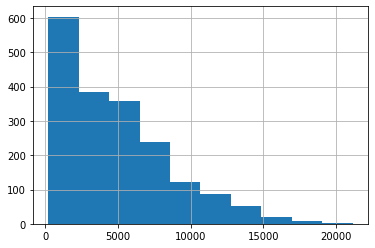

In [44]:
for x in monto:
    val[f'Lim_{x}'] = val[x] / val['LIMIT_BAL']

val['Lim_edad'] = val['LIMIT_BAL'] / val['AGE']

lim = [col for col in val.columns if col.startswith('Lim')]
num += lim

val['Lim_edad'].hist()

In [45]:
for col in estatus:
    aux = []
    for i in range(len(val)):
        if int(val[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(val[col][i])
    val[col] = aux

for col in estatus:
    display(val[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_1
2,-1,0.2000
3,-2,0.0976
0,0,0.4768
1,>=1,0.2256


,index,PAY_2
1,-1,0.215467
3,-2,0.132267
0,0,0.506667
2,>=1,0.145600


,index,PAY_3
1,-1,0.210667
2,-2,0.142400
0,0,0.510400
3,>=1,0.136533


,index,PAY_4
1,-1,0.205333
2,-2,0.149867
0,0,0.529067
3,>=1,0.115733


,index,PAY_5
1,-1,0.192000
2,-2,0.156267
0,0,0.556800
3,>=1,0.094933


,index,PAY_6
1,-1,0.206933
2,-2,0.170133
0,0,0.523733
3,>=1,0.099200


In [46]:
## Monto negativo/cero o pago igual a cero?
tipo = []
for col in monto + pago:
    aux = []
    for x in val[col]:
        if int(x) <= 0:
            aux.append('<=0')
        else:
            aux.append('>0')
    val[f'{col}_tipo'] = aux
    tipo += [f'{col}_tipo']

for x in tipo:
    display(val[x].value_counts(1).reset_index())

,index,BILL_AMT1_tipo
0,>0,0.909333
1,<=0,0.090667


,index,BILL_AMT2_tipo
0,>0,0.888533
1,<=0,0.111467


,index,BILL_AMT3_tipo
0,>0,0.870933
1,<=0,0.129067


,index,BILL_AMT4_tipo
0,>0,0.869333
1,<=0,0.130667


,index,BILL_AMT5_tipo
0,>0,0.856
1,<=0,0.144


,index,BILL_AMT6_tipo
0,>0,0.839467
1,<=0,0.160533


,index,PAY_AMT1_tipo
0,>0,0.825067
1,<=0,0.174933


,index,PAY_AMT2_tipo
0,>0,0.810133
1,<=0,0.189867


,index,PAY_AMT3_tipo
0,>0,0.800533
1,<=0,0.199467


,index,PAY_AMT4_tipo
0,>0,0.773333
1,<=0,0.226667


,index,PAY_AMT5_tipo
0,>0,0.7728
1,<=0,0.2272


,index,PAY_AMT6_tipo
0,>0,0.749333
1,<=0,0.250667


In [47]:
for col in cat[:3]:
    val[col] = val[col].astype(int)
    val[col] = val[col].astype(str)
val[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        1875 non-null   object
 1   EDUCATION  1875 non-null   object
 2   MARRIAGE   1875 non-null   object
 3   PAY_1      1875 non-null   object
 4   PAY_2      1875 non-null   object
 5   PAY_3      1875 non-null   object
 6   PAY_4      1875 non-null   object
 7   PAY_5      1875 non-null   object
 8   PAY_6      1875 non-null   object
dtypes: object(9)
memory usage: 132.0+ KB


In [48]:
val['SEX'].replace({'1':'Hombre',
                   '2':'Mujer'},inplace = True)

val['EDUCATION'].replace({'1':'Preparatoria',
                         '2':'Universidad',
                         '3':'Secundaria', 
                         '4':'Otros'}, inplace = True)

val['MARRIAGE'].replace({'1':'Soltero',
                        '2':'Casado',
                        '3':'Otros'}, inplace = True)

for i in range(1,7):
    val[f'PAY_{i}'].replace({'-2':'No_uso',
                           '0':'Uso', 
                           '-1':'Pago_correcto', 
                           '>=1':'Pago_retrasado'}, inplace = True)

In [49]:
num = list(pd.DataFrame(val.describe()).columns)
num = [x for x in num if x not in ['CUSTOMER_ID']]
cat = [col for col in val.columns if col not in num + ['CUSTOMER_ID']]

In [50]:
cat

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1_tipo',
 'BILL_AMT2_tipo',
 'BILL_AMT3_tipo',
 'BILL_AMT4_tipo',
 'BILL_AMT5_tipo',
 'BILL_AMT6_tipo',
 'PAY_AMT1_tipo',
 'PAY_AMT2_tipo',
 'PAY_AMT3_tipo',
 'PAY_AMT4_tipo',
 'PAY_AMT5_tipo',
 'PAY_AMT6_tipo']

In [51]:
pd.get_dummies(val[cat]).columns

Index(['SEX_Hombre', 'SEX_Mujer', 'EDUCATION_Otros', 'EDUCATION_Preparatoria',
       'EDUCATION_Secundaria', 'EDUCATION_Universidad', 'MARRIAGE_Casado',
       'MARRIAGE_Otros', 'MARRIAGE_Soltero', 'PAY_1_No_uso',
       'PAY_1_Pago_correcto', 'PAY_1_Pago_retrasado', 'PAY_1_Uso',
       'PAY_2_No_uso', 'PAY_2_Pago_correcto', 'PAY_2_Pago_retrasado',
       'PAY_2_Uso', 'PAY_3_No_uso', 'PAY_3_Pago_correcto',
       'PAY_3_Pago_retrasado', 'PAY_3_Uso', 'PAY_4_No_uso',
       'PAY_4_Pago_correcto', 'PAY_4_Pago_retrasado', 'PAY_4_Uso',
       'PAY_5_No_uso', 'PAY_5_Pago_correcto', 'PAY_5_Pago_retrasado',
       'PAY_5_Uso', 'PAY_6_No_uso', 'PAY_6_Pago_correcto',
       'PAY_6_Pago_retrasado', 'PAY_6_Uso', 'BILL_AMT1_tipo_<=0',
       'BILL_AMT1_tipo_>0', 'BILL_AMT2_tipo_<=0', 'BILL_AMT2_tipo_>0',
       'BILL_AMT3_tipo_<=0', 'BILL_AMT3_tipo_>0', 'BILL_AMT4_tipo_<=0',
       'BILL_AMT4_tipo_>0', 'BILL_AMT5_tipo_<=0', 'BILL_AMT5_tipo_>0',
       'BILL_AMT6_tipo_<=0', 'BILL_AMT6_tipo_>0', 'PA

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>],
       [<AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>,
        <AxesSubplot:title={'center':'Prom_monto'}>],
       [<AxesSubplot:title={'center':'Prom_pago'}>,
        <AxesSubplot:title={'center':'Lim_BILL_AMT1'}>,
        <AxesSubplot:title={'center':'Lim_BILL_AMT2'}>,
        <AxesSubplot:title={'center':'Lim_BILL_AMT3'}>,
        

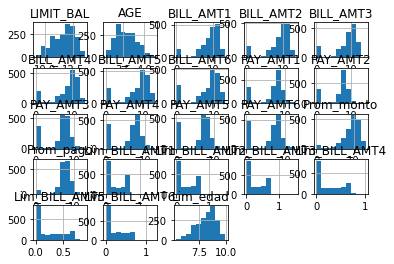

In [52]:
## Se obtiene el log de las variables para "tratar" outliers
for col in num:
    val[col] = np.log(abs(val[col]) + 1)
val[num].hist()

In [53]:
modelo = pd.get_dummies(val[cat]).join(val[num])
modelo.shape

(1875, 80)

In [54]:
X_train.shape

(5062, 80)

### Escalamiento

In [55]:
modelo = pd.DataFrame(mm_x.transform(modelo), columns = modelo.columns)
modelo.describe()

,SEX_Hombre,SEX_Mujer,EDUCATION_Otros,EDUCATION_Preparatoria,EDUCATION_Secundaria,EDUCATION_Universidad,MARRIAGE_Casado,MARRIAGE_Otros,MARRIAGE_Soltero,PAY_1_No_uso,PAY_1_Pago_correcto,PAY_1_Pago_retrasado,PAY_1_Uso,PAY_2_No_uso,PAY_2_Pago_correcto,PAY_2_Pago_retrasado,PAY_2_Uso,PAY_3_No_uso,PAY_3_Pago_correcto,PAY_3_Pago_retrasado,PAY_3_Uso,PAY_4_No_uso,PAY_4_Pago_correcto,PAY_4_Pago_retrasado,PAY_4_Uso,PAY_5_No_uso,PAY_5_Pago_correcto,PAY_5_Pago_retrasado,PAY_5_Uso,PAY_6_No_uso,PAY_6_Pago_correcto,PAY_6_Pago_retrasado,PAY_6_Uso,BILL_AMT1_tipo_<=0,BILL_AMT1_tipo_>0,BILL_AMT2_tipo_<=0,BILL_AMT2_tipo_>0,BILL_AMT3_tipo_<=0,BILL_AMT3_tipo_>0,BILL_AMT4_tipo_<=0,BILL_AMT4_tipo_>0,BILL_AMT5_tipo_<=0,BILL_AMT5_tipo_>0,BILL_AMT6_tipo_<=0,BILL_AMT6_tipo_>0,PAY_AMT1_tipo_<=0,PAY_AMT1_tipo_>0,PAY_AMT2_tipo_<=0,PAY_AMT2_tipo_>0,PAY_AMT3_tipo_<=0,PAY_AMT3_tipo_>0,PAY_AMT4_tipo_<=0,PAY_AMT4_tipo_>0,PAY_AMT5_tipo_<=0,PAY_AMT5_tipo_>0,PAY_AMT6_tipo_<=0,PAY_AMT6_tipo_>0,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,Lim_BILL_AMT1,Lim_BILL_AMT2,Lim_BILL_AMT3,Lim_BILL_AMT4,Lim_BILL_AMT5,Lim_BILL_AMT6,Lim_edad
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.00000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.395733,0.604267,0.017067,0.348800,0.166933,0.467200,0.531733,0.013333,0.454933,0.097600,0.200000,0.225600,0.476800,0.132267,0.215467,0.145600,0.506667,0.142400,0.210667,0.136533,0.510400,0.149867,0.205333,0.115733,0.529067,0.156267,0.192000,0.094933,0.556800,0.170133,0.206933,0.09920,0.523733,0.090667,0.909333,0.111467,0.888533,0.129067,0.870933,0.130667,0.869333,0.144000,0.856000,0.160533,0.839467,0.174933,0.825067,0.189867,0.810133,0.199467,0.800533,0.226667,0.773333,0.227200,0.772800,0.250667,0.749333,0.562728,0.410259,0.676812,0.662499,0.650913,0.650497,0.637224,0.624060,0.482880,0.465539,0.459696,0.448961,0.474732,0.449114,0.706354,0.563605,0.149134,0.146425,0.152876,0.146728,0.137946,0.148738,0.608884
std,0.489138,0.489138,0.129554,0.476718,0.373016,0.499056,0.499125,0.114728,0.498098,0.296852,0.400107,0.418088,0.499595,0.338871,0.411255,0.352799,0.500089,0.349553,0.407891,0.343446,0.500025,0.357036,0.404053,0.319990,0.499288,0.363205,0.393978,0.293201,0.496896,0.375850,0.405215,0.29901,0.499570,0.287211,0.287211,0.314793,0.314793,0.335363,0.335363,0.337125,0.337125,0.351183,0.351183,0.367198,0.367198,0.380011,0.380011,0.392300,0.392300,0.399706,0.399706,0.418787,0.418787,0.419135,0.419135,0.433513,0.433513,0.214084,0.207777,0.232332,0.248590,0.261871,0.264659,0.274141,0.286795,0.240388,0.238574,0.246556,0.259676,0.272406,0.276223,0.184103,0.156052,0.138693,0.137673,0.145519,0.140739,0.138076,0.154848,0.189836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

### Reducción de dimensiones

In [56]:
modelo = modelo[ls_best].copy()
modelo.sample()

,PAY_1_Pago_retrasado,PAY_1_Uso,PAY_2_Pago_retrasado,PAY_2_Uso,PAY_3_Pago_retrasado,PAY_3_Uso,PAY_4_Pago_retrasado,PAY_5_Pago_retrasado,PAY_6_Pago_retrasado,PAY_AMT1_tipo_<=0,PAY_AMT1_tipo_>0,PAY_AMT2_tipo_<=0,PAY_AMT2_tipo_>0,PAY_AMT3_tipo_<=0,PAY_AMT3_tipo_>0,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,Prom_pago,Lim_BILL_AMT5,Lim_edad
1270,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.474529,0.582693,0.531869,0.539512,0.565814,0.25543,0.580242


In [57]:
X.sample()

,PAY_1_Pago_retrasado,PAY_1_Uso,PAY_2_Pago_retrasado,PAY_2_Uso,PAY_3_Pago_retrasado,PAY_3_Uso,PAY_4_Pago_retrasado,PAY_5_Pago_retrasado,PAY_6_Pago_retrasado,PAY_AMT1_tipo_<=0,PAY_AMT1_tipo_>0,PAY_AMT2_tipo_<=0,PAY_AMT2_tipo_>0,PAY_AMT3_tipo_<=0,PAY_AMT3_tipo_>0,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,Prom_pago,Lim_BILL_AMT5,Lim_edad
3496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.367272,0.0,0.473542,0.467122,0.493649,0.005792,0.40392


In [58]:
modelo.shape , X.shape

((1875, 22), (5062, 22))

### Predicción

In [65]:
resultado = pd.DataFrame(logreg.predict(modelo))
resultado = pd.DataFrame(mm_y.inverse_transform(resultado),
                         columns = ['y_hat'])
resultado = pd.DataFrame(val['CUSTOMER_ID']).join(resultado)
resultado['y_hat'].mean()

0.09493333333333333

In [66]:
logreg.predict(X_test_mm[ls_best]).mean()

0.07460035523978685

In [67]:
resultado.to_csv(liga + 'FloresHernandezEfrainIsmael_DefaultPayment.csv',
                 index = False)